In [1]:
import numpy as np;
import pandas as pd;

import matplotlib.pyplot as plt;

In [2]:
# regression
# pred = mx + b
# m, b are weights
# error => mean((y - pred) ** 2)
# error_derivative
# dE / dpred = 2 * (y - ypred) = (y - ypred) ## 2 is a constant so it can be discarded
# dpred / dm = x
# dpred / dx = m
# dpred / db = 1
# dE / dm = dE / dpred * dpred / dm = (y - pred) * x
# dE / db = dE / dpred * dpred / db = (y - pred)
# dE / dx = dE / dpred * dpred / dx = (y - pred) * m

In [3]:
class LinearRegression:
    def __init__(self, inputs):
        self.x = inputs;
        self.m = np.random.randn();
        self.b = np.random.randn();
        self.grad = {};
    
    def forward(self):
        print(self.x);
        self.output = (self.m * self.x) + self.b;
        
        return self.output;
    
    def error(self, y):
        err = (self.output - y) ** 2;
        err = np.mean(err);
        
        return err;
    
    def error_derivative(self, y):
        dE_dm = 1 * (self.output - y) * self.x;
        dE_dm = np.mean(dE_dm);
        
        dE_db = 1 * (self.output - y);
        dE_db = np.mean(dE_db);
        
        self.grad['db'] = dE_db;
        self.grad['dm'] = dE_dm;
        
        return self.grad;
    
    def train(self, y, epochs, lr=0.0001, showgraph=False):
        for i in range(epochs):
            self.output = self.forward();
            err = self.error(y);
            derv = self.error_derivative(y);
            self.m = self.m - (lr * derv['dm']);
            self.b = self.b - (lr * derv['db']);
            
            if showgraph:
                plt.plot(self.x, self.output, color='g');
        
        return err;

In [4]:
data = pd.read_csv('data.csv', header=None, names=['X', 'y']);

In [5]:
X = data['X'].values;
y = data['y'].values;

m = 0;
c = 0;

L = 0.001;
epochs = 1000;

n = float(len(X));

for i in range(len(X)):
    y_pred = m * X + c;
    d_m = (-2 / n) * np.sum(X * (y_pred - y));
    d_c = (-2 / n) * np.sum(y_pred - y);
    
    m = m - L * d_m;
    c = c - L * d_c;

print(m, c);

-7.37891066403305e+77 -1.4503024083346106e+76


In [10]:
lreg = LinearRegression(inputs=X);

#lreg.train(y, epochs=20, showgraph=True);
#lreg.error(y)

In [11]:
y_pred = lreg.forward();

[32.50234527 53.42680403 61.53035803 47.47563963 59.81320787 55.14218841
 52.21179669 39.29956669 48.10504169 52.55001444 45.41973014 54.35163488
 44.1640495  58.16847072 56.72720806 48.95588857 44.68719623 60.29732685
 45.61864377 38.81681754 66.18981661 65.41605175 47.48120861 41.57564262
 51.84518691 59.37082201 57.31000344 63.61556125 46.73761941 50.55676015
 52.22399609 35.56783005 42.43647694 58.16454011 57.50444762 45.44053073
 61.89622268 33.09383174 36.43600951 37.67565486 44.55560838 43.31828263
 50.07314563 43.87061265 62.99748075 32.66904376 40.16689901 53.57507753
 33.86421497 64.70713867 38.11982403 44.50253806 40.59953838 41.72067636
 51.08863468 55.0780959  41.37772653 62.49469743 49.20388754 41.10268519
 41.18201611 50.18638949 52.37844622 50.13548549 33.64470601 39.55790122
 56.13038882 57.36205213 60.26921439 35.67809389 31.588117   53.66093226
 46.68222865 43.10782022 70.34607562 44.49285588 57.5045333  36.93007661
 55.80573336 38.95476907 56.9012147  56.86890066 34

In [8]:
import matplotlib.pyplot as plt;

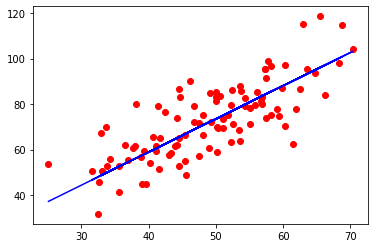

In [30]:
plt.scatter(X, y, color='r');
plt.plot(X, y_pred, color='b');

plt.show();